# <font color = blue> OList Retail Dataset - Capstone Project</font>


### <font color = blue> Importing the libraries and warnings</font>

In [1]:
# Importing all the necessary libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
#import warnings

import warnings
warnings.filterwarnings("ignore")  # To suppress all the warnings in the notebook

### <font color = blue>Read in the Retail Dataset excel</font>

#### 1. Orders 

In [3]:
# Reading the Orders sheet

orders = pd.read_excel("Downloads\\Retail_dataset.xlsx", sheet_name="orders")

In [4]:
orders.shape

(99441, 7)

In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


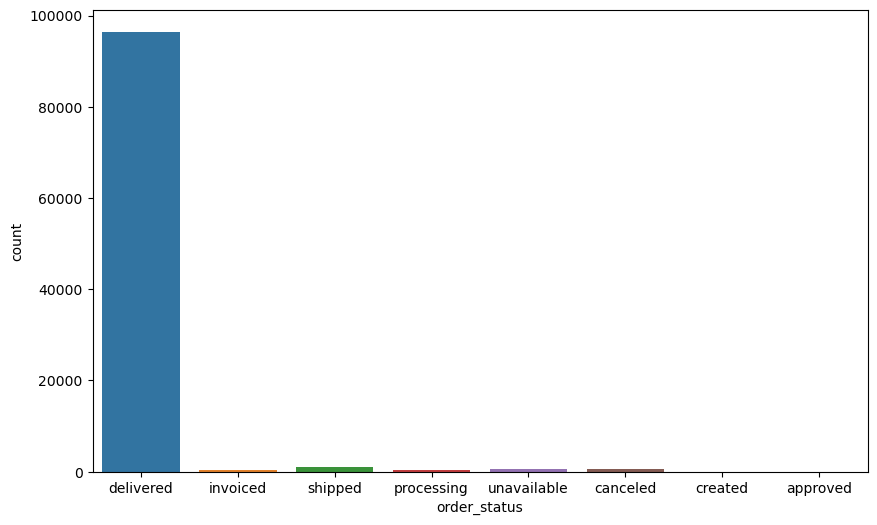

In [6]:
#Checking the differet 'order_status' and their counts.

plt.figure(figsize=(10,6))
sns.countplot(data=orders, x=orders['order_status'])
plt.show()

#### As required by the assignment, we are only interested in 'delivered' order status. Therefore, other order status can be dropped

In [7]:
#Checking different order statuses

orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [8]:
#Checking the total number of 'delivered' orders

(orders.order_status=="delivered").sum()

96478

In [9]:
#Restricting the orders dataframe with order_status as 'delivered'. Therefore only delivered orders selected.

orders = orders[orders.order_status=="delivered"]
orders.shape

(96478, 7)

In [10]:
#Checking the the order_status values again

orders.order_status.unique()

array(['delivered'], dtype=object)

In [11]:
# Checking if order_id is duplicate.

orders["order_id"].duplicated().sum()

0

In [12]:
#Checking missing values.

orders.isnull().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

In [13]:
#Imputing values of order_approved_at with order_purchase_timestamp

orders.order_approved_at.fillna(orders.order_purchase_timestamp,inplace=True)

#Imputing values of order_delivered_timestamp with order_estimated_delivery_date

orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace=True)

In [14]:
#Checking again if any missing values are left.

orders.isnull().sum().sort_values(ascending=False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

#### 2. Order_items 

In [15]:
# Reading the Order_items sheet

order_items = pd.read_excel("Downloads\\Retail_dataset.xlsx", sheet_name="order_items")
order_items.shape

(112650, 6)

In [16]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [17]:
#Checking missing values.

order_items.isnull().sum().sort_values(ascending=False)

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

#### 3. Customers 

In [18]:
# Reading the Order_items sheet

customers = pd.read_excel("Downloads\\Retail_dataset.xlsx", sheet_name="customers")
customers.shape

(99441, 4)

In [19]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [20]:
#Checking missing values.

customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [21]:
#Checking for duplicate customer values

customers.customer_id.duplicated().sum()

3345

In [22]:
#Dropping the duplicates and keeping the first occurence 

customers.drop_duplicates(subset="customer_id", keep="first", inplace=True)

In [23]:
#Checking the shape after dropping duplicates. It is less now 99441 - 3345 = 96096

customers.shape

(96096, 4)

In [24]:
#Validating if any duplicates left

customers.customer_id.duplicated().sum()

0

#### 4. Payments

In [25]:
# Reading the Payments sheet
payments = pd.read_excel("Downloads\\Retail_dataset.xlsx", sheet_name="payments")
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [26]:
payments.shape

(103886, 5)

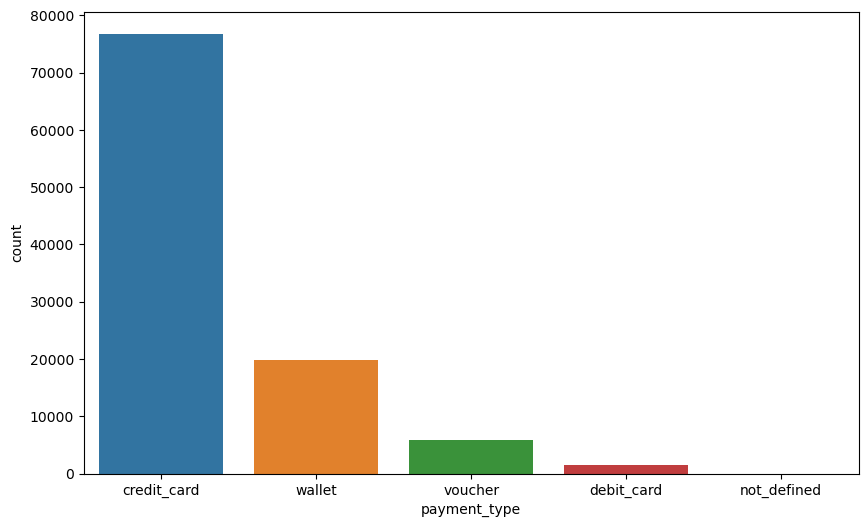

In [27]:
#Checking the most used 'payment_type' and their counts.

plt.figure(figsize=(10,6))
sns.countplot(data=payments, x=payments['payment_type'])
plt.show()

#### We can see that Credit card is the most used payment type for purchase.

In [28]:
#Checking the payments 'not defined' affected rows
payments[payments['payment_type']=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [29]:
#Since there are only 3 recors affected, we can drop these records.

i=payments[payments['payment_type']=='not_defined'].index
payments.drop(i, axis=0, inplace=True)

In [30]:
# Validating if payment type 'not_defined' is dropped

payments.payment_type.unique()

array(['credit_card', 'wallet', 'voucher', 'debit_card'], dtype=object)

In [31]:
#Checking missing values.
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### 5. Products

In [32]:
# Reading the Products sheet

products = pd.read_excel("Downloads\\Retail_dataset.xlsx", sheet_name="products")
products.shape

(32951, 6)

In [33]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [34]:
#Checking missing values.

products.isna().sum().sort_values(ascending=False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [35]:
#Checking the mode of "product_category_name" for imputing the categorical variable - 'product_category_name'

products["product_category_name"].mode()[0]

'toys'

In [36]:
#Imputing the product_category_name NULL values

products["product_category_name"].fillna(products["product_category_name"].mode()[0], inplace=True)

In [37]:
#Checking missing values again for remaing columns.

products.isna().sum().sort_values(ascending=False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [38]:
#Checking the description of Numerical columns to gain insights on the NULL values of remaining columns
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


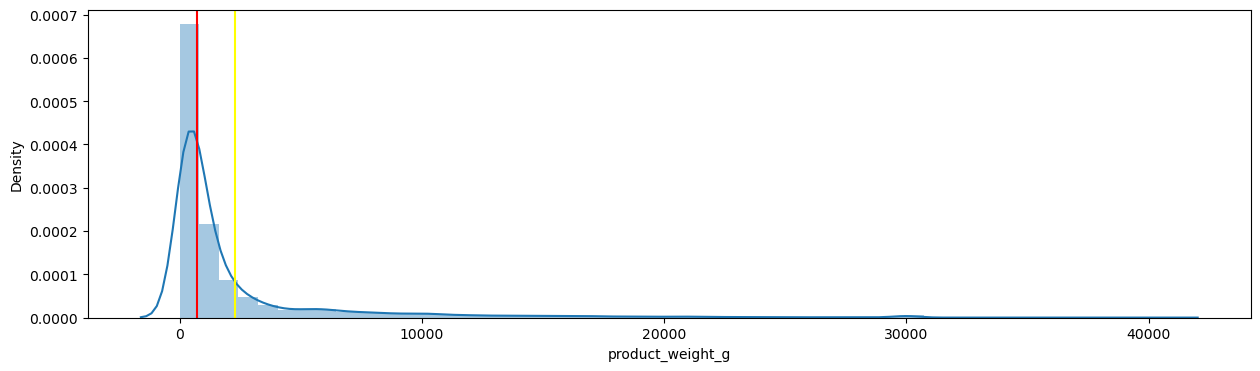

In [39]:
#Visualizing the product_weight_g for data skewness

plt.figure(figsize=(15,4))
sns.distplot(products.product_weight_g)
plt.axvline(products.product_weight_g.mean(), color="yellow")
plt.axvline(products.product_weight_g.median(), color="red")
plt.show()

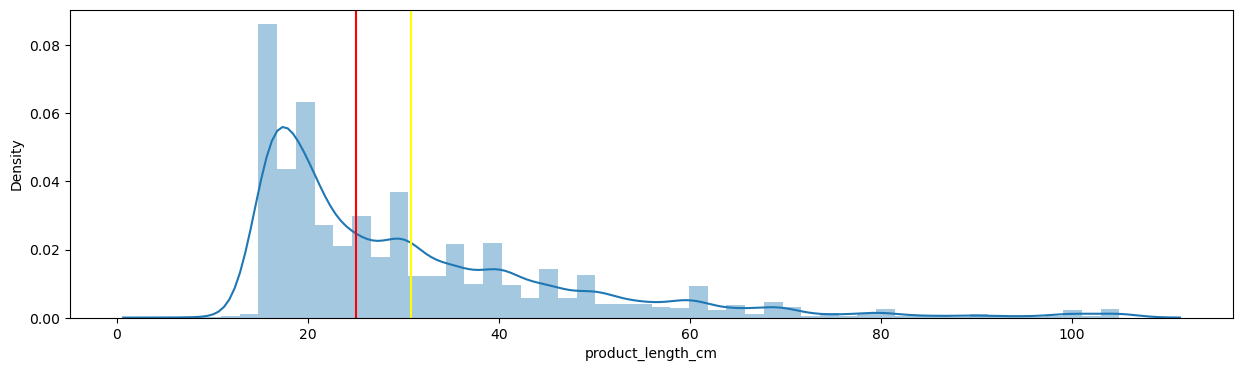

In [40]:
#Visualizing the product_length_cm for data skewness

plt.figure(figsize=(15,4))
sns.distplot(products.product_length_cm)
plt.axvline(products.product_length_cm.mean(), color="yellow")
plt.axvline(products.product_length_cm.median(), color="red")
plt.show()

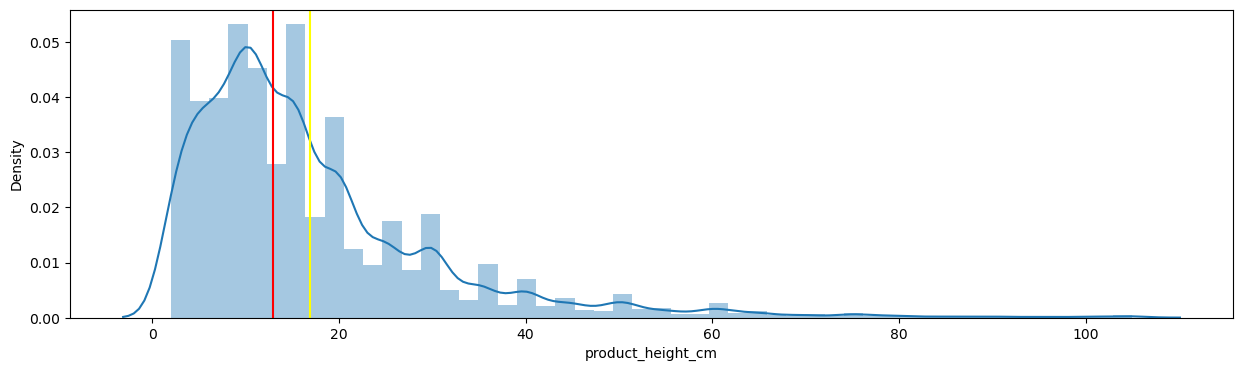

In [41]:
#Visualizing the product_height_cm for data skewness

plt.figure(figsize=(15,4))
sns.distplot(products.product_height_cm)
plt.axvline(products.product_height_cm.mean(), color="yellow")
plt.axvline(products.product_height_cm.median(), color="red")
plt.show()

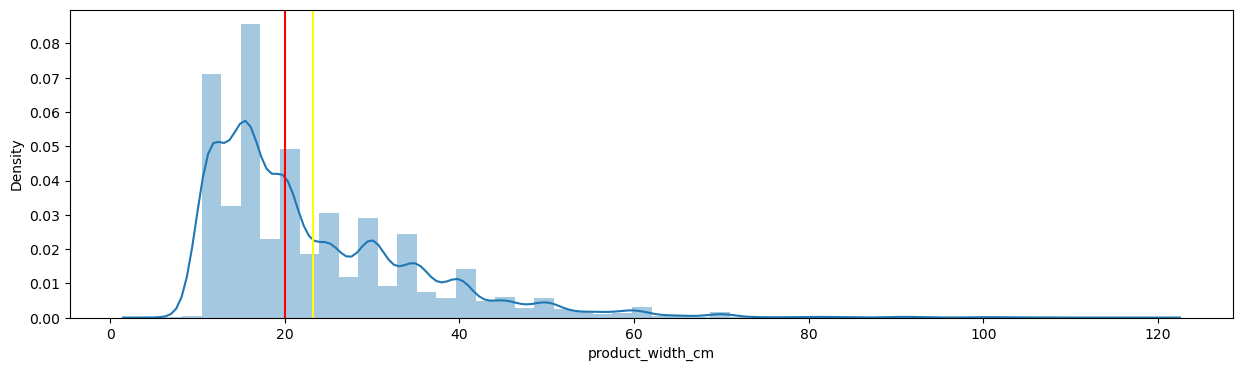

In [42]:
#Visualizing the product_width_cm for data skewness

plt.figure(figsize=(15,4))
sns.distplot(products.product_width_cm)
plt.axvline(products.product_width_cm.mean(), color="yellow")
plt.axvline(products.product_width_cm.median(), color="red")
plt.show()

In [43]:
#Imputing the missing values with appropriate method. Since all of them having right skewed distribution, therefore Median.

products.product_weight_g.fillna(products.product_weight_g.median(), inplace=True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace=True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace=True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace=True)

In [44]:
#Validating missing values after imputing.

products.isna().sum().sort_values(ascending=False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

#### After all the sheets are cleaned and prepared, the different datasets will be merged to use the final dataset based on the given data model (ERD) for:

-  Removing the Outliers.  
-  Market Basket analysis using apriori alogorithm. 


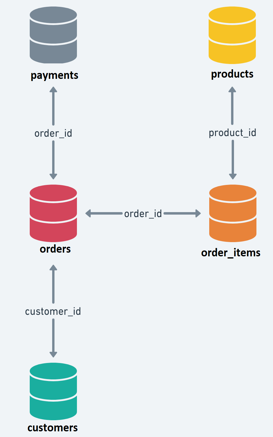

In [45]:
#Creating a new dataframe 'orders_delivered'. 
#This dataframe will contain the data merged using different dataframes.

#Merging 'orders' with 'order_items'

orders_delivered = pd.merge(orders,order_items,how='inner',on='order_id')

In [46]:
orders_delivered.shape

(110197, 12)

In [47]:
#Merging 'orders_delivered' with 'products'

orders_delivered = pd.merge(orders_delivered,products,how='inner',on='product_id')

In [48]:
orders_delivered.shape

(110197, 17)

In [49]:
#Merging 'orders_delivered' with 'payments'

orders_delivered = pd.merge(orders_delivered,payments,how='inner',on='order_id')

In [50]:
orders_delivered.shape

(115035, 21)

In [51]:
#Merging 'orders_delivered' with 'customers'

orders_delivered = pd.merge(orders_delivered,customers,how='inner',on='customer_id')

In [52]:
orders_delivered.shape

(115035, 24)

In [53]:
# The final 'orders_delivered' dataframe

orders_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,1,credit_card,1,18.12,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,3,voucher,1,2.00,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,2,voucher,1,18.59,3149,sao paulo,SP
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,...,19.0,14.0,12.0,1,credit_card,1,44.11,3149,sao paulo,SP
4,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,1,credit_card,3,37.77,3366,sao paulo,SP


In [54]:
#Validating again if there are any NULLs, although we have taken care of all the NULLs seperately for all the sheets.

orders_delivered.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

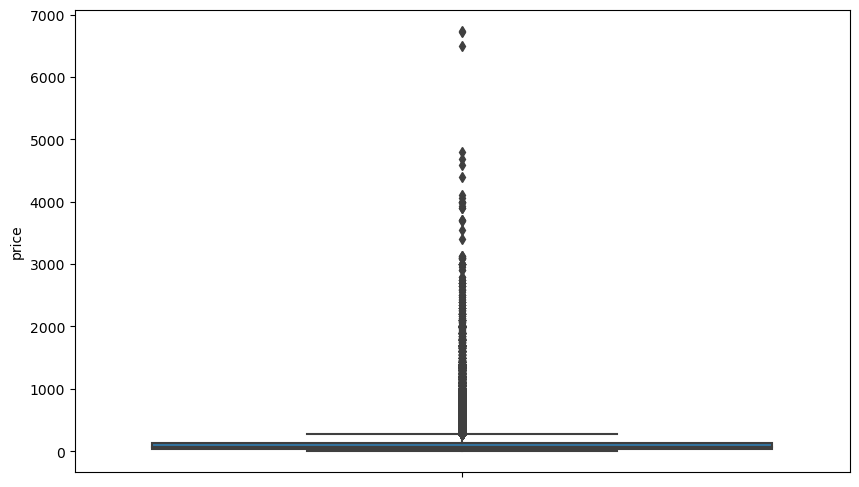

In [55]:
#Checking for 'price' outliers

plt.figure(figsize=(10,6))
sns.boxplot(data=orders_delivered, y=orders_delivered['price'])
plt.show()

In [56]:
#Assuming that anything above the price of 3000 is too expensive and shall be removed.
#Therefore checking the records for further investigation 

orders_delivered[orders_delivered['price']>3000].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state
37462,b239ca7cd485940b31882363b52e6674,ca27f3dac28fb1063faddd424c9d95fa,delivered,2018-07-29 08:39:48,2018-07-30 08:15:14,2018-07-31 23:03:28,2018-08-07,1,dd113cb02b2af9c8e5787e8f1f0722f6,821fb029fc6e495ca4f08a35d51e53a5,...,55.0,25.0,45.0,1,debit_card,1,4163.51,34018,nova lima,MG
37463,a53e05ecd2ed1f46a2b8e1f5828be7c6,bc5e25094a7d51b6aee35236572e64f4,delivered,2018-01-26 14:30:21,2018-01-27 14:35:51,2018-02-02 13:53:10,2018-02-15,1,dd113cb02b2af9c8e5787e8f1f0722f6,821fb029fc6e495ca4f08a35d51e53a5,...,55.0,25.0,45.0,1,credit_card,10,3826.80,35660,para de minas,MG
37655,3a4b013e014723cc38c9faa8ffdc6387,2c3b08cf3584d8c0a81d9618a73aa219,delivered,2018-04-09 11:32:37,2018-04-10 07:35:20,2018-04-13 02:06:43,2018-04-24,1,34f99d82cfc355d08d8db780d14aa002,a00824eb9093d40e589b940ec45c4eb0,...,39.0,95.0,42.0,1,credit_card,8,3526.46,19023,presidente prudente,SP
42087,f5136e38d1a14a4dbd87dff67da82701,ff4159b92c40ebe40454e3e6a7c35ed6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-06-05 17:09:48,2017-06-28,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,...,47.0,25.0,25.0,1,wallet,1,6726.66,17506,marilia,SP
42677,1d54db601b417ccdfd3b7071955e6cc7,bbeb907759ef5fc169099af3c88d535d,delivered,2018-04-27 05:57:39,2018-04-28 10:29:50,2018-05-03 23:52:04,2018-05-15,1,6e729bd456c54469a9af4c8774f1eab7,039e6ad9dae79614493083e241147386,...,18.0,39.0,31.0,1,credit_card,5,3209.72,89113,gaspar,SC


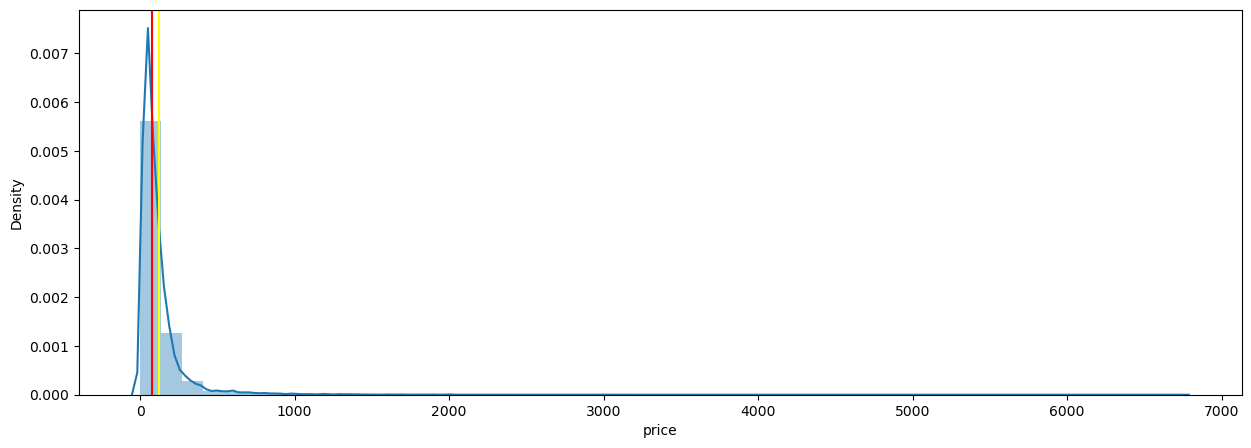

In [57]:
# Toys are usually not that costly, therefore the prices are outliers.
# Checking the correct measure for imputation using skewness

plt.figure(figsize=(15,5))
sns.distplot(orders_delivered.price)
plt.axvline(orders_delivered.price.mean(), color="yellow")
plt.axvline(orders_delivered.price.median(), color="red")
plt.show()


In [58]:
#Imputing the prices of Toys that are above 3000 with median

orders_delivered.loc[((orders_delivered['price']>3000) & (orders_delivered['product_category_name']=='toys')), 'price']=orders_delivered['price'].median()

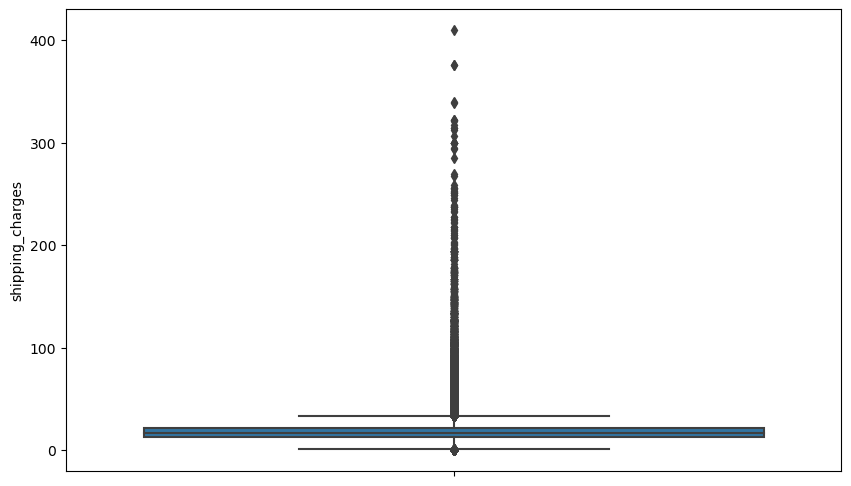

In [59]:
#Checkinh for 'shipping_charges' outliers

plt.figure(figsize=(10,6))
sns.boxplot(data=orders_delivered, y=orders_delivered['shipping_charges'])
plt.show()

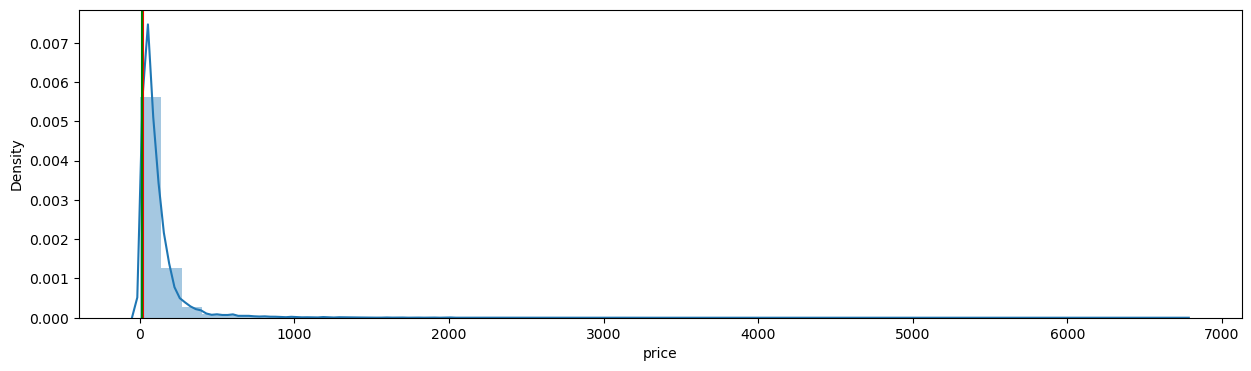

In [60]:
# Toys are usually not that costly, therefore the prices are outliers.
# Checking the correct measure for imputation using skewness

plt.figure(figsize=(15,4))
sns.distplot(orders_delivered.price)
plt.axvline(orders_delivered.shipping_charges.mean(), color="red")
plt.axvline(orders_delivered.shipping_charges.median(), color="green")
plt.show()

In [61]:
#Imputing the shipping_charges that are above 100 with median

orders_delivered.loc[orders_delivered['shipping_charges']>100, 'shipping_charges'] = orders_delivered['shipping_charges'].median()

## Market Basket Analysis using Association Rules and Apriori

In [62]:
#Installing the package Machine learning Extension - mlxtend

!pip install mlxtend

In [63]:
#Load apriori and association modules from mlxtend.frequent_patterns 

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [64]:
#Updating orders_delivered dataframe with only the required columns for analysis

orders_delivered = orders_delivered[['order_id','product_category_name', 'order_item_id']]

In [65]:
#Checking the duplicates after updating

orders_delivered.duplicated().sum()

4841

In [66]:
#Dropping the duplicates keeping the first occurence

orders_delivered.drop_duplicates(keep='first', inplace=True)

In [67]:
#Creating prd_combo dataframe using pandas pivot, this is required for basket analysis

prd_combo = pd.pivot_table(data=orders_delivered,index='order_id',columns='product_category_name',
                              values='order_item_id',fill_value=0)

In [68]:
prd_combo.head()

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
#For basket analysis encoding the data to 1s and 0s 
def encdata(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
prd_combo_encode = prd_combo.applymap(encdata)

In [70]:
prd_combo_encode.shape

(96477, 70)

In [71]:
#As reuired by the assignment, dropping the Product_cataegories (columns) whose sum value (total_sale) 
#is less than equal to 5

for column in prd_combo_encode.columns:
    if (prd_combo_encode[column].sum(axis=0, skipna=True)<=5):
        prd_combo_encode.drop(column, inplace=True, axis=1)



In [72]:
prd_combo_encode.shape

(96477, 61)

In [73]:
#Selecting only those order_ids where at least two items were purchased to find product combinations.
#This is reuired else the 'Toys' product_category will affect the whole analysis. 
#Because the Support value for 'Toys' is biased due to its too much presence as single item orders 

prd_combo_encode = prd_combo_encode[(prd_combo_encode>0).sum(axis=1)>=2]
prd_combo_encode.head()

product_category_name,agro_industry_and_commerce,air_conditioning,art,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,...,pet_shop,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00337fe25a3780b3424d9ad7c5a4b35e,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00946f674d880be1f188abc10ad7cf46,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
00bcee890eba57a9767c7b5ca12d3a1b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
01144cadcf64b6427f0a6580a3033220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
013a98b3a668bcef05b98898177f6923,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Generating frequent itemsets from a list of items

First step in generation of association rules is to get all the frequent itemsets.Frequent itemsets are the ones which occur at least a minimum number of times in the transactions.

In [74]:
'''Call apriori function and passing minimum support here we are passing 3%, which means at least 3% in total number 
   of transaction the item should be present.'''
#Support - This measure gives an idea of how frequent `ItemSet` is in all the transactions.

frequent_items = apriori(prd_combo_encode, min_support=0.03, use_colnames=True)
frequent_items

C:\Users\leeth\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.031201,(auto)
1,0.230889,(bed_bath_table)
2,0.084243,(computers_accessories)
3,0.032761,(fashion_bags_accessories)
4,0.127145,(furniture_decor)
5,0.042122,(garden_tools)
6,0.066303,(health_beauty)
7,0.053822,(housewares)
8,0.055382,(sports_leisure)
9,0.971139,(toys)


#### Generating all possible rules from the frequent itemsets.

After the frequent itemsets are generated, identifying rules such as Confidence and Lift



In [75]:
#We would apply association rules on frequent itemset to find product combinations. 
#Confidence - This measure defines the likeliness of occurrence of consequent on the cart given that the cart 
#already has the antecedents.

rules_conf = association_rules(frequent_items, metric="confidence", min_threshold=0.1)
rules_conf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(auto),(toys),0.031201,0.971139,0.030421,0.975000,1.003976,0.000120,1.154446,0.004088
1,(bed_bath_table),(toys),0.230889,0.971139,0.226989,0.983108,1.012325,0.002764,1.708580,0.015830
2,(toys),(bed_bath_table),0.971139,0.230889,0.226989,0.233735,1.012325,0.002764,1.003714,0.421845
3,(computers_accessories),(toys),0.084243,0.971139,0.080343,0.953704,0.982047,-0.001469,0.623401,-0.019573
4,(fashion_bags_accessories),(toys),0.032761,0.971139,0.031981,0.976190,1.005202,0.000165,1.212168,0.005350
5,(toys),(furniture_decor),0.971139,0.127145,0.119345,0.122892,0.966546,-0.004131,0.995151,-0.545301
6,(furniture_decor),(toys),0.127145,0.971139,0.119345,0.938650,0.966546,-0.004131,0.470437,-0.038141
7,(garden_tools),(toys),0.042122,0.971139,0.035101,0.833333,0.858099,-0.005805,0.173167,-0.147222
8,(health_beauty),(toys),0.066303,0.971139,0.063183,0.952941,0.981262,-0.001207,0.613300,-0.020042
9,(housewares),(toys),0.053822,0.971139,0.049142,0.913043,0.940178,-0.003127,0.331903,-0.063010


In [76]:
#Lift - This measure defines the likeliness of occurrence of consequent on the cart given that the cart already 
#has the antecedent, but controlling the popularity of consequent.
#Here we are setting based on lift and keeping minimum lift as >1.

rules_lift=rules_conf[(rules_conf['lift'] > 1)]
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(auto),(toys),0.031201,0.971139,0.030421,0.975000,1.003976,0.000120,1.154446,0.004088
1,(bed_bath_table),(toys),0.230889,0.971139,0.226989,0.983108,1.012325,0.002764,1.708580,0.015830
2,(toys),(bed_bath_table),0.971139,0.230889,0.226989,0.233735,1.012325,0.002764,1.003714,0.421845
4,(fashion_bags_accessories),(toys),0.032761,0.971139,0.031981,0.976190,1.005202,0.000165,1.212168,0.005350
11,(watches_gifts),(toys),0.058502,0.971139,0.056942,0.973333,1.002260,0.000128,1.082293,0.002395


#### As required by the assignment, cleaned datasets are needed, therefore Exporting cleaned dataset to an excel and other Market Basket metrics data to create dashboard using Tableau.

In [77]:
#Extracting the clean datasheets to be uploaded
with pd.ExcelWriter("Downloads\\Clean_Retail_dataset.xlsx") as excel_sheets:
    #Extracting the clean datasheets
    orders.to_excel(excel_sheets, sheet_name="orders", index=False)
    order_items.to_excel(excel_sheets, sheet_name="order_items", index=False)
    products.to_excel(excel_sheets, sheet_name="products", index=False)
    customers.to_excel(excel_sheets, sheet_name="customers", index=False)
    payments.to_excel(excel_sheets, sheet_name="payments", index=False)
    
#Extracting the additional markest basket metrics data to be visualized
#Taking care of the frozenset before exporting
frequent_items["itemsets"] = frequent_items["itemsets"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules_conf["antecedents"] = rules_conf["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules_conf["consequents"] = rules_conf["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules_lift["antecedents"] = rules_lift["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules_lift["consequents"] = rules_lift["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 

with pd.ExcelWriter("Downloads\\Apriori_Market_basket.xlsx") as excel_sheets:    
    frequent_items.to_excel(excel_sheets, sheet_name="support", index=False)
    rules_conf.to_excel(excel_sheets, sheet_name="confidence", index=False)
    rules_lift.to_excel(excel_sheets, sheet_name="lift", index=False)

### => For further analysis and visualization of this dataset, please check the Tableau file.

---